<a href="https://oilprice.com/"><img src = "../images/" width = 400, align = "center"></a>
# <center>QUANTITY CRUDE OIL PRODUCTION (1965 - 2018)</center>


#### About this Notebook
In this notebook, we would use web scrapping to extarct the qunatity of oil produced from 1965 through 2018 and added with a chart of the top 20 oil producing countries in the world. The data is scrapped from different sources including :
1. [WIKIPEDIA source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
2. [OPEC source](https://en.wikipedia.org/wiki/List_of_countries_by_oil_production)
3. [STATISTA source](https://www.statista.com/statistics/265203/global-oil-production-since-in-barrels-per-day)
4. [OECD source](https://www.oecd-ilibrary.org/energy/data/iea-oil-information-statistics_oil-data-en)
5. [QUANDL source](https://www.quandl.com/api/v3/datasets/BP/OIL_PROD_WRLD.csv?api_key=uLQRncMrku_zW44hbgc2)


The dataset is then cleaned, presented in various visualisation patterns using different visualisation libraries and tools before exporting into a readable format for references (which can be used to build simple-regression or multi-regression models using machine learning techniques).

### TASK(S)
1. EXTRACT CRUDE OIL PRODUCTION QUANITY FOR *TOP TWENTY PRODUCING COUNTRIES* WORLD FOR THE PERIOD (1965 -  2018)
2. EXTRACT CRUDE OIL PRODUCTION QUANITY FOR *TOP TWENTY PRODUCING COMPANIES* WORLD FOR THE PERIOD (1965 -  2018)
3. COMBINE THE DATA COLLECTED INTO A **READABLE FORMAT** FOR REFERENCE()

**Crude oil production**

It is defined as the quantities of oil extracted from the ground after the removal of inert matter or impurities. It includes crude oil, natural gas liquids (NGLs) and additives. This indicator is measured in thousand tonne of oil equivalent (toe).Crude oil is a mineral oil consisting of a mixture of hydrocarbons of natural origin, yellow to black in colour, and of variable density and viscosity. NGLs are the liquid or liquefied hydrocarbons produced in the manufacture, purification and stabilisation of natural gas. Additives are non-hydrocarbon substances added to or blended with a product to modify its properties, for example, to improve its combustion characteristics (e.g. MTBE and tetraethyl lead).Refinery production refers to the output of secondary oil products from an oil refinery.

### Import dependencies

In [30]:
%matplotlib inline
import itertools
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # imports numpy library
import pandas as pd #imports pandas library
import json #imports json library

### Import datasets

In [15]:
oil_prod_df=pd.read_csv('../data/BP-OIL_PROD_WRLD.csv')
oil_prod_df.tail(2)

,Date,Value
52,1966-12-31,1702.215717
53,1965-12-31,1567.587268


### Data Cleaning

In [16]:
#REVERSE THE ORDER OF PRESENTATION OF THE DATES
rev_oil_prod_df=oil_prod_df.reindex(index=oil_prod_df.index[::-1])
rev_oil_prod_df

# REORDER THE INDEX OF THE DATES
rev_oil_prod_df=rev_oil_prod_df.reset_index(drop=True)
rev_oil_prod_df.tail()

,Date,Value
49,2014-12-31,4223.177081
50,2015-12-31,4354.823310
51,2016-12-31,4367.980221
52,2017-12-31,4379.862350
53,2018-12-31,4474.326494


In [12]:
#RENAME THE COLUMNS
rev_oil_prod_df2 =rev_oil_prod_df.rename(columns={'Date':'Date(YY/MM/DD)', 'Value':'QoP(MMMbbl/yr)'})
rev_oil_prod_df2.head()

,Date(YY/MM/DD),QoP(MMMbbl/yr)
0,1965-12-31,1567.587268
1,1966-12-31,1702.215717
2,1967-12-31,1826.175476
3,1968-12-31,1992.260473
4,1969-12-31,2144.479052


In [19]:
#Lookup Qunatity of Production greater than 2,000MMMbbl/yr
rev_oil_prod_df2[rev_oil_prod_df2['QoP(MMMbbl/yr)'] >= 2000]

,Date(YY/MM/DD),QoP(MMMbbl/yr)
4,1969-12-31,2144.479052
5,1970-12-31,2358.889372
6,1971-12-31,2493.619063
7,1972-12-31,2635.423176
8,1973-12-31,2875.762980
9,1974-12-31,2882.171384
10,1975-12-31,2737.552412
11,1976-12-31,2974.260422
12,1977-12-31,3078.137564
13,1978-12-31,3106.105936


In [21]:
#Lookup Qunatity of Production greater than 4,000MMMbbl/yr
rev_oil_prod_df2[rev_oil_prod_df2['QoP(MMMbbl/yr)'] >= 4000]

,Date(YY/MM/DD),QoP(MMMbbl/yr)
46,2011-12-31,4008.035311
47,2012-12-31,4120.291054
48,2013-12-31,4128.500818
49,2014-12-31,4223.177081
50,2015-12-31,4354.823310
51,2016-12-31,4367.980221
52,2017-12-31,4379.862350
53,2018-12-31,4474.326494


#### Plots of Yearly production of crude globally

In [23]:
# check the data type to be plotted
print(rev_oil_prod_df2.dtypes)

Date(YY/MM/DD)     object
QoP(MMMbbl/yr)    float64
dtype: object


In [27]:
# conver the date(yy/mm/dd) to a datw format 
rev_oil_prod_df2['Date(YY/MM/DD)']=pd.to_datetime(rev_oil_prod_df2['Date(YY/MM/DD)'])
rev_oil_prod_df2.sort_values('Date(YY/MM/DD)', inplace=True)

# assign the axis tobe plotted
x=rev_oil_prod_df2['Date(YY/MM/DD)']
y=rev_oil_prod_df2['QoP(MMMbbl/yr)']

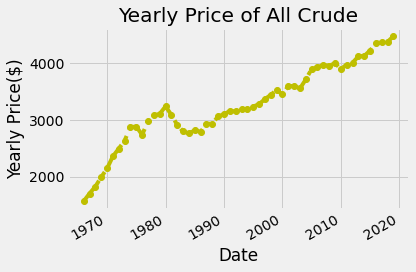

<Figure size 720x1080 with 0 Axes>

In [34]:
#Line Plot
plt.style.use('fivethirtyeight')
plt.plot_date(x, y, color='y', linestyle='dashdot')
plt.xlabel('Date')
plt.ylabel('Yearly Price($)')
plt.title('Yearly Production of All Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearly.png')
plt.show()

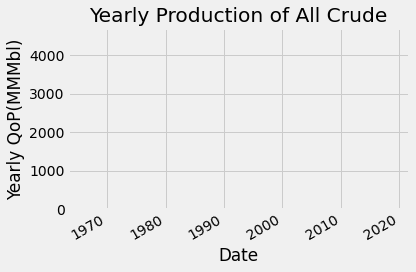

<Figure size 720x1080 with 0 Axes>

In [41]:
# Bar Plot
plt.style.use('fivethirtyeight')
plt.bar(x, y, color='y', linestyle='dashdot')
plt.xlabel('Date')
plt.ylabel('Yearly QoP(MMMbl)')
plt.title('Yearly Production of All Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearl-y2.png')
plt.show()

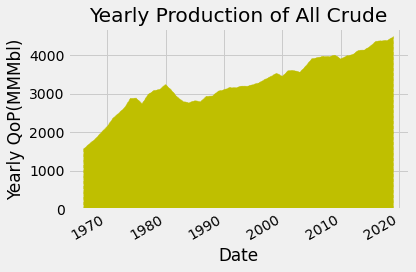

<Figure size 720x1080 with 0 Axes>

In [42]:
# Area Plot
# Bar Plot
plt.style.use('fivethirtyeight')
plt.stackplot(x, y, color='y', linestyle='dashdot')
plt.xlabel('Date')
plt.ylabel('Yearly QoP(MMMbl)')
plt.title('Yearly Production of All Crude')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearly-3.png')
plt.show()

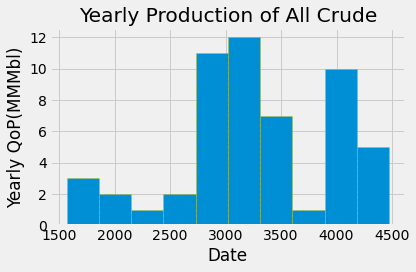

<Figure size 720x1080 with 0 Axes>

In [43]:
# Histogram Plot
plt.style.use('fivethirtyeight')
plt.hist(y, bins=10, edgecolor='y', linestyle='dashdot')
plt.xlabel('Date')
plt.ylabel('Yearly QoP(MMMbl)')
plt.title('Yearly Production of All Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearly-4.png')
plt.show()

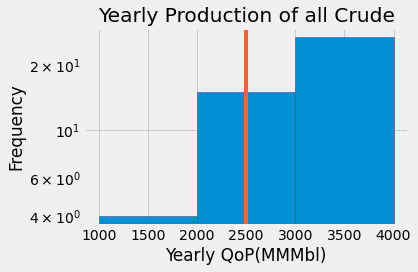

<Figure size 720x1080 with 0 Axes>

In [45]:
# Histogram Plot-II
plt.style.use('fivethirtyeight')
bins=[1000, 2000, 3000, 4000]
plt.hist(y, bins=bins, edgecolor='brown', linestyle='solid', log=True)

median_price=2500
color="#fe5f31"
plt.axvline(median_price, color=color, label='Median Price')

plt.xlabel('Yearly QoP(MMMbl)')
plt.ylabel('Frequency')
plt.title('Yearly Production of all Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearly-5.png')
plt.show()

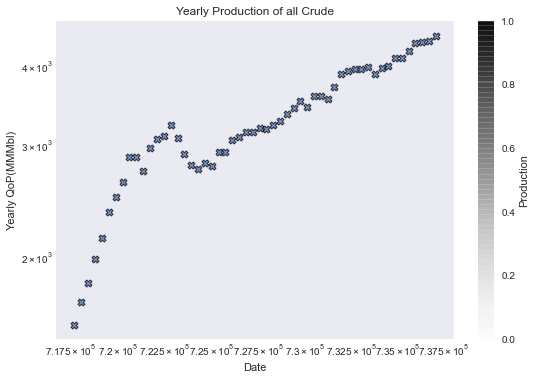

<Figure size 720x1080 with 0 Axes>

In [46]:
# Scatter Plot

plt.style.use('seaborn')
plt.scatter(x, y, edgecolor='black', alpha=0.75, 
            cmap='Greens', linewidth=1, marker='X')

cbar=plt.colorbar()
cbar.set_label('Production')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Yearly QoP(MMMbl)')
plt.title('Yearly Production of all Crude')
plt.tight_layout()
plt.figure(figsize=(10, 15))
plt.savefig(r'..\images\prod_yearly-6.png')
plt.show()

### Mathematical Operations

In [48]:
# describe the yealy dataset
rev_oil_prod_df2.describe()

,QoP(MMMbbl/yr)
count,54.000000
mean,3258.213916
std,702.349689
min,1567.587268
25%,2877.365081
50%,3192.560595
75%,3898.068218
max,4474.326494


In [49]:
# Mean of Yearly Production of Crude
rev_oil_prod_df2['QoP(MMMbbl/yr)'].mean()

3258.2139156601847

In [50]:
# Max and Min Value of Yearly Production of Crude
max_yearly = rev_oil_prod_df2['QoP(MMMbbl/yr)'].max()
print(max_yearly)

min_yearly = rev_oil_prod_df2['QoP(MMMbbl/yr)'].min()
print(min_yearly)

4474.3264942000005
1567.58726831


### Inferences and Recommendation

[Click here to read from this file]('https://wwww.google.drive')

### Created by **@chisomloius**